<a href="https://colab.research.google.com/github/sahikacelenk/AISummerCamp_FinalProjects/blob/main/Proje2_TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Transfer Learning Projesi

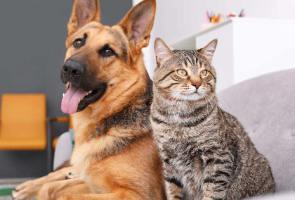

Bu projede “Cats and Dogs” veri seti kullanılarak Transfer Learning ile derin öğrenme modeli eğitilmiştir.

Veriseti Kaynak: https://www.microsoft.com/en-us/download/details.aspx?id=54765

In [ ]:
# Veri setinin indirilmesi, colab ortamına yüklenmesi
!pip3 install gdown
!gdown --id "14ldbyr7HEmUcmRPDPm9Sh3j9qz2Cam5e" -O kagglecatsanddogs.zip
!unzip kagglecatsanddogs.zip -d ./kagglecatsanddogs/

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: ./kagglecatsanddogs/PetImages/Dog/5500.jpg  
  inflating: ./kagglecatsanddogs/PetImages/Dog/5501.jpg  
  inflating: ./kagglecatsanddogs/PetImages/Dog/5502.jpg  
  inflating: ./kagglecatsanddogs/PetImages/Dog/5503.jpg  
  inflating: ./kagglecatsanddogs/PetImages/Dog/5504.jpg  
  inflating: ./kagglecatsanddogs/PetImages/Dog/5505.jpg  
  inflating: ./kagglecatsanddogs/PetImages/Dog/5506.jpg  
  inflating: ./kagglecatsanddogs/PetImages/Dog/5507.jpg  
  inflating: ./kagglecatsanddogs/PetImages/Dog/5508.jpg  
  inflating: ./kagglecatsanddogs/PetImages/Dog/5509.jpg  
  inflating: ./kagglecatsanddogs/PetImages/Dog/551.jpg  
  inflating: ./kagglecatsanddogs/PetImages/Dog/5510.jpg  
  inflating: ./kagglecatsanddogs/PetImages/Dog/5511.jpg  
  inflating: ./kagglecatsanddogs/PetImages/Dog/5512.jpg  
  inflating: ./kagglecatsanddogs/PetImages/Dog/5513.jpg  
  inflating: ./kagglecatsanddogs/PetImages/Dog/5514.jpg  
  inflating: ./kagglecatsa

In [ ]:
# Gerekli kütüphanelerin yüklenmesi
import os
import cv2
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [ ]:
# Görüntülerin resize edilmesi
# Okuma sırasında hata veren görsellerin, ayrı listelere kaydedilmesi

cats_names = os.listdir("kagglecatsanddogs/PetImages/Cat/")
dogs_names = os.listdir("kagglecatsanddogs/PetImages/Dog/")
sil_cats = []
sil_dogs = []


for f_name in cats_names:
  try:
    path = "kagglecatsanddogs/PetImages/Cat/" + f_name
    image = Image.open(path)
    new_image = image.resize((128, 128))
    new_path = "/content/new_resized/cats." + f_name
    new_image.save(new_path)
  except:
    print(f_name)
    sil_cats.append("/content/new_resized/cats." + f_name)
    continue

850.jpg
2663.jpg
11095.jpg
6435.jpg
7978.jpg
11935.jpg
936.jpg
9778.jpg
11210.jpg
3300.jpg
9171.jpg
660.jpg
5370.jpg
10125.jpg
4833.jpg
140.jpg
5553.jpg
666.jpg
12080.jpg
Thumbs.db
8470.jpg
10501.jpg
11874.jpg
7968.jpg
9565.jpg
3491.jpg
10820.jpg
11565.jpg


In [ ]:
# Görüntülerin resize edilmesi
# Okuma sırasında hata veren görsellerin, ayrı listelere kaydedilmesi

for f_name in dogs_names:
  try:
    path = "kagglecatsanddogs/PetImages/Dog/" + f_name
    image = Image.open(path)
    new_image = image.resize((128, 128))
    new_path = "/content/new_resized/dogs." + f_name
    new_image.save(new_path)
  except:
    print(f_name)
    sil_dogs.append("/content/new_resized/dogs." + f_name)
    continue

11853.jpg
11675.jpg
3588.jpg
2384.jpg
1259.jpg
10747.jpg
5736.jpg
1866.jpg
10158.jpg
7969.jpg
8730.jpg
6718.jpg
7133.jpg
11410.jpg
3136.jpg
7369.jpg
2877.jpg
2688.jpg
10401.jpg
7112.jpg
5604.jpg
6059.jpg
11702.jpg
Thumbs.db
1308.jpg
3288.jpg
9188.jpg
6238.jpg
4367.jpg
6318.jpg
7514.jpg
11849.jpg
11285.jpg
10797.jpg
7459.jpg


In [ ]:
# For döngüsü içinde etiketlerin görsellere atanması
filenames = os.listdir("/content/new_resized")

labels = []
input_path = []

for i in range(len(filenames)):
  input_path.append("/content/new_resized/" + filenames[i])
  file_name = filenames[i]
  label = file_name[0:4]

  if label == 'dogs':
    labels.append(0)
  else:
    labels.append(1)


In [ ]:
# Görüntü sayılarının kontrol edilmesi
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[12499 12499]


In [ ]:
# Görüntü isimleri ve etiketlerin kullanılarak dataframe oluşturulması
df = pd.DataFrame()
df['images'] = input_path
df['label'] = labels
df = df.sample(frac=1).reset_index(drop=True)
df.head()


,images,label
0,/content/new_resized/cats.3715.jpg,1
1,/content/new_resized/cats.4678.jpg,1
2,/content/new_resized/dogs.1033.jpg,0
3,/content/new_resized/cats.4880.jpg,1
4,/content/new_resized/cats.11655.jpg,1


In [66]:
# Görüntü klasörleri içinde hataya sebep olan ve ayrı listeye kaydedilen görüntülerin silinmesi
# Model sırasında hata alınması nedeniyle bu aşamaya ihtiyaç duyulmuştur.
df = df[df['images']!='/content/new_resized/dogs.Thumbs.db']
df = df[df['images']!='/content/new_resized/cats.Thumbs.db']

df.drop(df[df.images.isin(sil_cats)].index.tolist(), inplace=True)
df.drop(df[df.images.isin(sil_dogs)].index.tolist(), inplace=True)

In [70]:
# Hata veren görsellerin silinmesi sonrası, dataframe sayısının kontrol edilmesi
df.shape

(24939, 2)

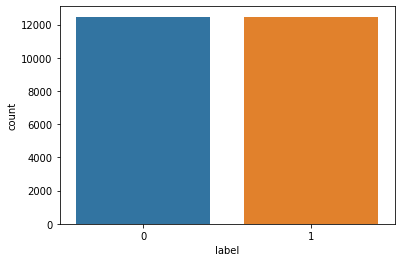

In [71]:
# Her iki kategoriye ait görsel sayısının barplot üzerinde görselleştirilmesi
import seaborn as sns
sns.countplot(df['label'])

In [72]:
# Dataframe etiket sütununun string data tipine dönüştürülmesi
df['label'] = df['label'].astype('str')
df.head(10)

,images,label
0,/content/new_resized/cats.3715.jpg,1
1,/content/new_resized/cats.4678.jpg,1
2,/content/new_resized/dogs.1033.jpg,0
3,/content/new_resized/cats.4880.jpg,1
4,/content/new_resized/cats.11655.jpg,1
5,/content/new_resized/cats.7103.jpg,1
6,/content/new_resized/cats.10924.jpg,1
7,/content/new_resized/dogs.8832.jpg,0
8,/content/new_resized/dogs.6127.jpg,0
9,/content/new_resized/cats.143.jpg,1


In [74]:
# Datasetinin train ve set olarak ayrılması
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [76]:
# Normalizasyon adımları
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(
    rescale = 1./255,  # görsellerin normalize edilmesi
    rotation_range = 40, # overfittingin önlenmesi için görüntülerin büyütülmesi
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train,x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test,x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

Found 19951 validated image filenames belonging to 2 classes.
Found 4988 validated image filenames belonging to 2 classes.


In [77]:
# Modelin oluşturulması
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
            Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
            MaxPool2D((2,2)),
            Conv2D(32, (3,3), activation='relu'),
            MaxPool2D((2,2)),
            Conv2D(64, (3,3), activation='relu'),
            MaxPool2D((2,2)),
            Flatten(),
            Dense(512, activation='relu'),
            Dense(1, activation='sigmoid')
])

In [78]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [79]:
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)


Epoch 1/10
39/39 [==============================] - 338s 9s/step - loss: 0.6856 - accuracy: 0.5670 - val_loss: 0.6241 - val_accuracy: 0.6510
Epoch 2/10
39/39 [==============================] - 327s 8s/step - loss: 0.6052 - accuracy: 0.6708 - val_loss: 0.5702 - val_accuracy: 0.6981
Epoch 3/10
39/39 [==============================] - 327s 8s/step - loss: 0.5669 - accuracy: 0.7050 - val_loss: 0.5344 - val_accuracy: 0.7316
Epoch 4/10
39/39 [==============================] - 335s 9s/step - loss: 0.5482 - accuracy: 0.7225 - val_loss: 0.5530 - val_accuracy: 0.7099
Epoch 5/10
39/39 [==============================] - 328s 8s/step - loss: 0.5203 - accuracy: 0.7437 - val_loss: 0.4838 - val_accuracy: 0.7654
Epoch 6/10
39/39 [==============================] - 337s 9s/step - loss: 0.4946 - accuracy: 0.7593 - val_loss: 0.4692 - val_accuracy: 0.7765
Epoch 7/10
39/39 [==============================] - 323s 8s/step - loss: 0.4810 - accuracy: 0.7685 - val_loss: 0.4652 - val_accuracy: 0.7799
Epoch 8/10
39

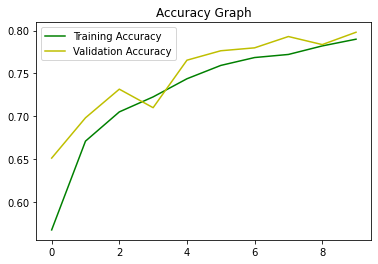

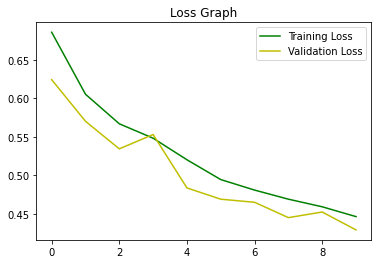

In [80]:
# Model sonuçlarının görselleştirilmesi
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'y', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'y', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()